# {Project Title}📝

![Banner](./assets/banner.jpeg)

## Topic
*What problem are you (or your stakeholder) trying to address?*
📝 <!-- Answer Below -->

## Project Question
*What specific question are you seeking to answer with this project?*
*This is not the same as the questions you ask to limit the scope of the project.*
📝 <!-- Answer Below -->

## What would an answer look like?
*What is your hypothesized answer to your question?*
📝 <!-- Answer Below -->

## Data Sources
*What 3 data sources have you identified for this project?*
*How are you going to relate these datasets?*
📝 <!-- Answer Below -->

## Approach and Analysis
*What is your approach to answering your project question?*
*How will you use the identified data to answer your project question?*
📝 <!-- Start Discussing the project here; you can add as many code cells as you need -->

imports

In [14]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import re
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

from sklearn.model_selection import train_test_split

from sklearn.metrics import mean_squared_error



loading the data and changing up the date and price column

In [34]:

df = pd.read_csv("dataset/steam_games.csv")
df1 = pd.read_csv("dataset/steam.csv")
df2 = pd.read_csv('dataset/games.csv')
replace_dict = {'Free': 0.00, 'Free To Play': 0.00}
df['original_price'] = df['original_price'].replace(replace_dict, regex=False)
df['original_price'] = df['original_price'].str.replace('$', '', regex=False)
specific_value = 0
mask = (df['original_price'] == specific_value)
new_df = df.loc[~mask]
new_df['original_price'] = new_df['original_price'].replace(replace_dict)
new_df['original_price'] = new_df['original_price'].str.replace('$', '', regex=False)
new_df['all_reviews'] = new_df['all_reviews'].str.split(',', n=1).str[0]
df2.head()

,AppID,Name,Release date,Estimated owners,Peak CCU,Required age,Price,DLC count,About the game,Supported languages,...,Average playtime two weeks,Median playtime forever,Median playtime two weeks,Developers,Publishers,Categories,Genres,Tags,Screenshots,Movies
0,20200,Galactic Bowling,"Oct 21, 2008",0 - 20000,0,0,19.99,0,Galactic Bowling is an exaggerated and stylize...,['English'],...,0,0,0,Perpetual FX Creative,Perpetual FX Creative,"Single-player,Multi-player,Steam Achievements,...","Casual,Indie,Sports","Indie,Casual,Sports,Bowling",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...
1,655370,Train Bandit,"Oct 12, 2017",0 - 20000,0,0,0.99,0,THE LAW!! Looks to be a showdown atop a train....,"['English', 'French', 'Italian', 'German', 'Sp...",...,0,0,0,Rusty Moyher,Wild Rooster,"Single-player,Steam Achievements,Full controll...","Action,Indie","Indie,Action,Pixel Graphics,2D,Retro,Arcade,Sc...",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...
2,1732930,Jolt Project,"Nov 17, 2021",0 - 20000,0,0,4.99,0,Jolt Project: The army now has a new robotics ...,"['English', 'Portuguese - Brazil']",...,0,0,0,Campião Games,Campião Games,Single-player,"Action,Adventure,Indie,Strategy",NaN,https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...
3,1355720,Henosis™,"Jul 23, 2020",0 - 20000,0,0,5.99,0,HENOSIS™ is a mysterious 2D Platform Puzzler w...,"['English', 'French', 'Italian', 'German', 'Sp...",...,0,0,0,Odd Critter Games,Odd Critter Games,"Single-player,Full controller support","Adventure,Casual,Indie","2D Platformer,Atmospheric,Surreal,Mystery,Puzz...",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...
4,1139950,Two Weeks in Painland,"Feb 3, 2020",0 - 20000,0,0,0.00,0,ABOUT THE GAME Play as a hacker who has arrang...,"['English', 'Spanish - Spain']",...,0,0,0,Unusual Games,Unusual Games,"Single-player,Steam Achievements","Adventure,Indie","Indie,Adventure,Nudity,Violent,Sexual Content,...",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...


more data cleanup and changing the columns to the right type

In [16]:

df['popular_tags'] = df['popular_tags'].astype('str')
df['game_details'] = df['game_details'].astype('str')
df['genre'] = df['genre'].astype('str')




In [17]:

tag_counter = new_df['popular_tags'].str.count(',') + 1
new_df['tag_counter'] = tag_counter
new_df['tag_counter'] = new_df['tag_counter'].astype('float')


In [18]:
#find unique tags
all_words = []

for text in df['genre']:
    words = text.split()
    all_words.extend(words)
unique_words = set(all_words)
#print(unique_words)
print(all_words)


['Action', 'Action,Adventure,Massively', 'Multiplayer', 'Action,Adventure,Strategy', 'Action,Adventure,Massively', 'Multiplayer', 'Action,Free', 'to', 'Play,Massively', 'Multiplayer,RPG,Strategy', 'Action,Adventure', 'Action', 'Adventure,Indie', 'Strategy,Early', 'Access', 'Action,Adventure,RPG', 'Adventure,Indie,RPG,Strategy', 'Adventure', 'Action,Adventure,Free', 'to', 'Play,Massively', 'Multiplayer,RPG', 'Action', 'Indie,Simulation,Strategy', 'Simulation,Strategy', 'Action,Indie,Early', 'Access', 'Action', 'Action,Free', 'to', 'Play', 'Strategy', 'Action', 'Adventure', 'Racing', 'Action,RPG', 'Action,Adventure', 'Action,Adventure', 'Action', 'Indie,Simulation', 'RPG', 'Adventure,RPG', 'Free', 'to', 'Play,Massively', 'Multiplayer,RPG', 'Action,Adventure,Indie', 'Adventure', 'Action,Adventure,RPG', 'Indie,Simulation,Strategy', 'Action', 'Free', 'to', 'Play,Massively', 'Multiplayer,RPG', 'Adventure', 'Action,RPG', 'Action', 'Strategy', 'Adventure,RPG,Simulation', 'Action', 'Action', 'A

counting the number of tags

In [37]:
num_tags = new_df['popular_tags'].str.count(',') + 1
new_df['tag_counter'] = num_tags
new_df['tag_counter'] = new_df['tag_counter'].astype('float')

num_tags = df2['Tags'].str.count(',') + 1
df2['tag_counter'] = num_tags
df2['tag_counter'] = df2['tag_counter'].astype('float')

df2['Release date'] = df2['Release date'].apply(lambda x: x.split(', ')[-1])
df2.head()

,AppID,Name,Release date,Estimated owners,Peak CCU,Required age,Price,DLC count,About the game,Supported languages,...,Median playtime forever,Median playtime two weeks,Developers,Publishers,Categories,Genres,Tags,Screenshots,Movies,tag_counter
0,20200,Galactic Bowling,2008,0 - 20000,0,0,19.99,0,Galactic Bowling is an exaggerated and stylize...,['English'],...,0,0,Perpetual FX Creative,Perpetual FX Creative,"Single-player,Multi-player,Steam Achievements,...","Casual,Indie,Sports","Indie,Casual,Sports,Bowling",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...,4.0
1,655370,Train Bandit,2017,0 - 20000,0,0,0.99,0,THE LAW!! Looks to be a showdown atop a train....,"['English', 'French', 'Italian', 'German', 'Sp...",...,0,0,Rusty Moyher,Wild Rooster,"Single-player,Steam Achievements,Full controll...","Action,Indie","Indie,Action,Pixel Graphics,2D,Retro,Arcade,Sc...",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...,20.0
2,1732930,Jolt Project,2021,0 - 20000,0,0,4.99,0,Jolt Project: The army now has a new robotics ...,"['English', 'Portuguese - Brazil']",...,0,0,Campião Games,Campião Games,Single-player,"Action,Adventure,Indie,Strategy",NaN,https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...,NaN
3,1355720,Henosis™,2020,0 - 20000,0,0,5.99,0,HENOSIS™ is a mysterious 2D Platform Puzzler w...,"['English', 'French', 'Italian', 'German', 'Sp...",...,0,0,Odd Critter Games,Odd Critter Games,"Single-player,Full controller support","Adventure,Casual,Indie","2D Platformer,Atmospheric,Surreal,Mystery,Puzz...",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...,19.0
4,1139950,Two Weeks in Painland,2020,0 - 20000,0,0,0.00,0,ABOUT THE GAME Play as a hacker who has arrang...,"['English', 'Spanish - Spain']",...,0,0,Unusual Games,Unusual Games,"Single-player,Steam Achievements","Adventure,Indie","Indie,Adventure,Nudity,Violent,Sexual Content,...",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...,6.0


I learned that developers prefer to keep their tags count lower

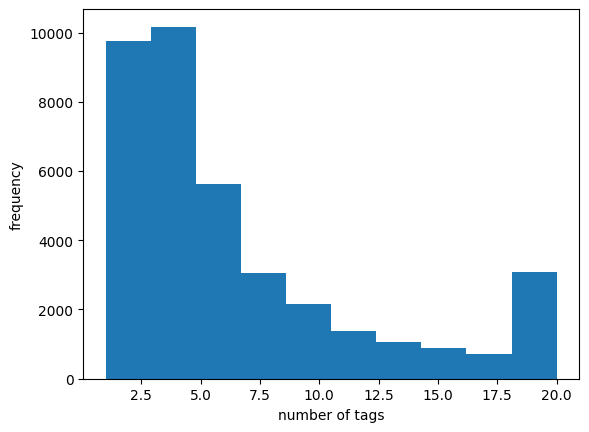

In [31]:

plt.hist(new_df['tag_counter'])
plt.xlabel('number of tags')
plt.ylabel('frequency')
plt.show()

dlc count over time

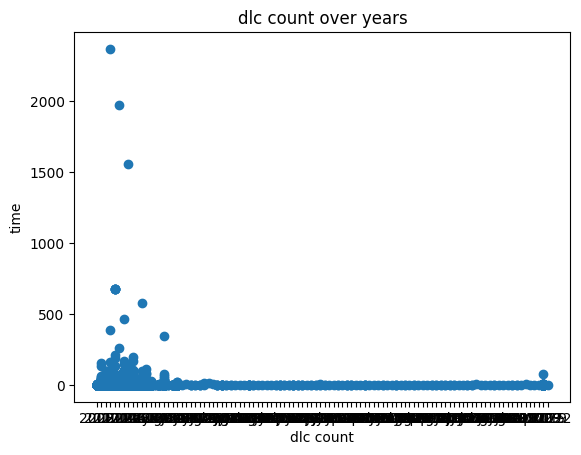

In [30]:
plt.scatter(df2['Release date'],df2['DLC count'])
plt.title('dlc count over years')
plt.xlabel('dlc count')
plt.ylabel('time')
plt.show()

price vs number of tags

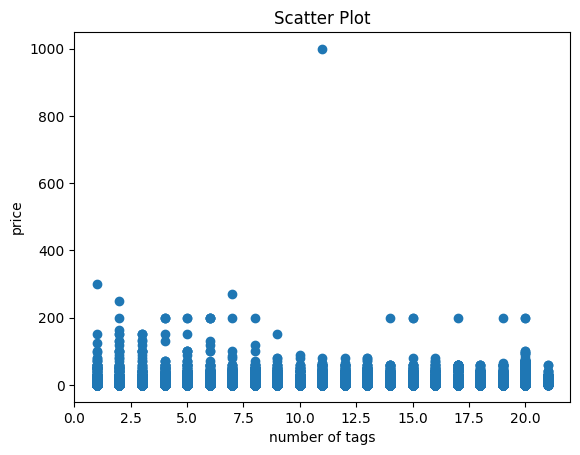

In [39]:
plt.scatter(df2['tag_counter'],df2['Price'])
plt.title('Scatter Plot')
plt.xlabel('number of tags')
plt.ylabel('price')
plt.show()

do tags influence the estimated owners

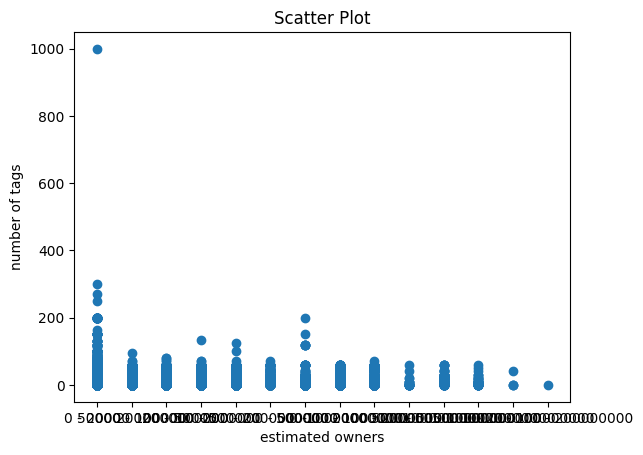

In [43]:
plt.scatter(df2['Estimated owners'],df2['Price'])
plt.title('Scatter Plot')
plt.ylabel('number of tags')
plt.xlabel('estimated owners')
plt.show()

games are  being released more over time

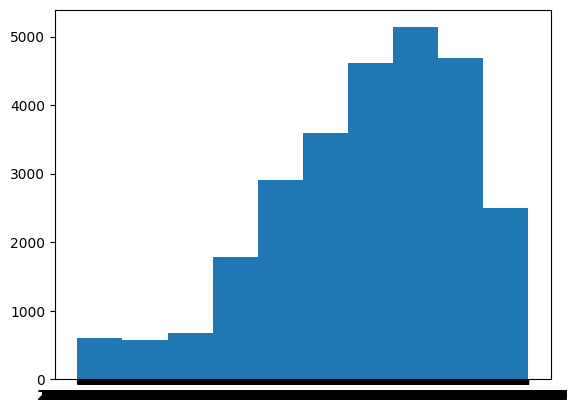

In [ ]:
plt.hist(df1['release_date'])
plt.show()

counting the number of words in the description

In [ ]:
wordcount = df2['About the game'].str.count(' ') + 1
df2['words'] = wordcount
df2['words'] = df2['words'].astype('float')

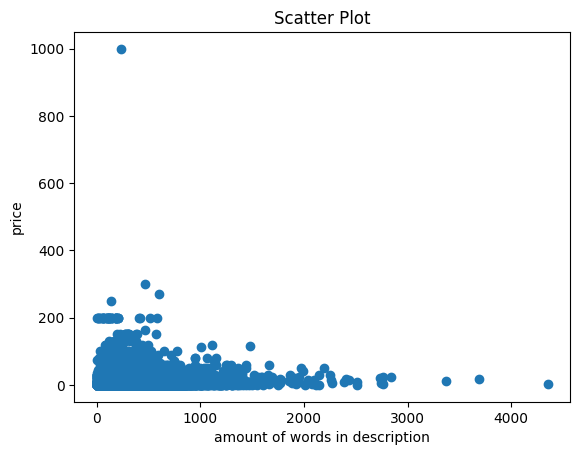

In [ ]:
plt.scatter(df2['words'],df2['Price'])
plt.title('Scatter Plot')
plt.xlabel('amount of words in description')
plt.ylabel('price')
plt.show()

In [47]:
corr_matrix = df2.corr()['Recommendations'].sort_values(ascending=False)
print(corr_matrix)


Recommendations               1.000000
Positive                      0.896496
Negative                      0.793220
Peak CCU                      0.524643
Score rank                    0.242897
Average playtime forever      0.183198
Metacritic score              0.124136
Required age                  0.098897
Average playtime two weeks    0.089819
Median playtime two weeks     0.058007
tag_counter                   0.055333
Price                         0.050899
Median playtime forever       0.038400
Linux                         0.024916
Mac                           0.022865
DLC count                     0.021794
Achievements                  0.012670
Windows                       0.000887
User score                   -0.000758
AppID                        -0.052990
Name: Recommendations, dtype: float64


C:\Users\husem\AppData\Local\Temp\ipykernel_15160\3669105812.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df2.corr()['Recommendations'].sort_values(ascending=False)


In [48]:
nonandf2 = df2.fillna(0)
X = nonandf2[['Positive', 'Negative','DLC count','Score rank','Metacritic score']]
y = nonandf2['Recommendations']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
lr = LinearRegression()
lr.fit(X_train, y_train)

y_pred = lr.predict(X_test)
accuracy = lr.score(X_test, y_test)
print(accuracy)


0.6333754275270005


In [ ]:
nonandf2.head()

,AppID,Name,Release date,Estimated owners,Peak CCU,Required age,Price,DLC count,About the game,Supported languages,...,Average playtime two weeks,Median playtime forever,Median playtime two weeks,Developers,Publishers,Categories,Genres,Tags,Screenshots,Movies
0,20200,Galactic Bowling,2008,0 - 20000,0,0,19.99,0,Galactic Bowling is an exaggerated and stylize...,['English'],...,0,0,0,Perpetual FX Creative,Perpetual FX Creative,"Single-player,Multi-player,Steam Achievements,...","Casual,Indie,Sports","Indie,Casual,Sports,Bowling",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...
1,655370,Train Bandit,2017,0 - 20000,0,0,0.99,0,THE LAW!! Looks to be a showdown atop a train....,"['English', 'French', 'Italian', 'German', 'Sp...",...,0,0,0,Rusty Moyher,Wild Rooster,"Single-player,Steam Achievements,Full controll...","Action,Indie","Indie,Action,Pixel Graphics,2D,Retro,Arcade,Sc...",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...
2,1732930,Jolt Project,2021,0 - 20000,0,0,4.99,0,Jolt Project: The army now has a new robotics ...,"['English', 'Portuguese - Brazil']",...,0,0,0,Campião Games,Campião Games,Single-player,"Action,Adventure,Indie,Strategy",0,https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...
3,1355720,Henosis™,2020,0 - 20000,0,0,5.99,0,HENOSIS™ is a mysterious 2D Platform Puzzler w...,"['English', 'French', 'Italian', 'German', 'Sp...",...,0,0,0,Odd Critter Games,Odd Critter Games,"Single-player,Full controller support","Adventure,Casual,Indie","2D Platformer,Atmospheric,Surreal,Mystery,Puzz...",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...
4,1139950,Two Weeks in Painland,2020,0 - 20000,0,0,0.00,0,ABOUT THE GAME Play as a hacker who has arrang...,"['English', 'Spanish - Spain']",...,0,0,0,Unusual Games,Unusual Games,"Single-player,Steam Achievements","Adventure,Indie","Indie,Adventure,Nudity,Violent,Sexual Content,...",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...


In [ ]:
nonandf2 = df2.fillna(0)
X = nonandf2[['Positive', 'Negative','DLC count','Score rank','Metacritic score']]
y = nonandf2['Price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
lr = LinearRegression()
lr.fit(X_train, y_train)

y_pred = lr.predict(X_test)
accuracy = lr.score(X_test, y_test)
print(accuracy)

## Resources and References
*What resources and references have you used for this project?*
📝 <!-- Answer Below -->

In [ ]:
# ⚠️ Make sure you run this cell at the end of your notebook before every submission!
!jupyter nbconvert --to python source.ipynb

[NbConvertApp] Converting notebook source.ipynb to python
[NbConvertApp] Writing 1271 bytes to source.py
